In [ ]:

%pprint
import sys
import os.path as osp
sys.path.insert(1, osp.abspath('../py'))
from StatsByCountry import nu


# Weekly Worship vs Human Development Index


According to Wikipedia, the **Human Development Index** (HDI) s a statistical composite index of life expectancy, education (mean years of schooling completed and expected years of schooling upon entering the education system), and per capita income indicators, which is used to rank countries into four tiers of human development. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher. It was developed by Pakistani economist Mahbub ul-Haq and was further used to measure a country's development by the United Nations Development Programme (UNDP)'s Human Development Report Office.

[RadicalLiberation](https://www.youtube.com/@RadicalLiberation), in his reading of _Triumph of Faith_ by Rodney Stark ([Global Religious Resurgence](https://www.youtube.com/live/RxZbjmuSZfI?si=f0e6oC9lBThQ6kE6&t=1365)), states that "he says that you cannot find a correlation between modernization and religiousness (which would be the suggestion of the secularization thesis)". I wanted to see if I could reproduce it.

The worship data is from [https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf](https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf) and the HDI data is from [https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index](https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index). The jupyter notebook can be seen at [https://github.com/dbabbitt/StatsByCountry/blob/master/scatterplots/Weekly%20Worship%20vs%20Human%20Development%20Index.ipynb](https://github.com/dbabbitt/StatsByCountry/blob/master/scatterplots/Weekly%20Worship%20vs%20Human%20Development%20Index.ipynb).

A [low R-square of at least 0.1 (or 10 percent)](https://www.researchgate.net/publication/361406942_The_Acceptable_R-Square_in_Empirical_Modelling_for_Social_Science_Research) is acceptable in the social sciences on the condition that some or most of the predictors or explanatory variables are statistically significant.

In [1]:

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index'
table_dfs_list = nu.get_page_tables(url)

Pretty printing has been turned OFF
[(1, (193, 5)), (2, (15, 8)), (3, (20, 2)), (10, (13, 2)), (12, (13, 2)), (14, (8, 2)), (13, (6, 2)), (0, (3, 3)), (4, (2, 2)), (6, (2, 2)), (7, (2, 2)), (8, (2, 2)), (9, (2, 2)), (11, (2, 2)), (5, (1, 2))]


In [2]:

hdi_df = table_dfs_list[1].copy()
hdi_df.columns = ['Rank', 'Δ', 'Country', 'hdi_value', 'percent_annual_growth_2010_2022']
hdi_df

,Rank,Δ,Country,hdi_value,percent_annual_growth_2010_2022
0,1,NaN,Switzerland,0.967,0.24%
1,2,(1),Norway,0.966,0.25%
2,3,NaN,Iceland,0.959,0.28%
3,4,(2),Hong Kong,0.956,0.38%
4,5,(1),Denmark,0.952,0.35%
...,...,...,...,...,...
188,189,(2),Niger,0.394,1.34%
189,189,NaN,Chad,0.394,0.66%
190,191,NaN,Central African Republic,0.387,0.67%
191,192,(2),South Sudan,0.381,0.53%


In [3]:

# From https://assets.pewresearch.org/wp-content/uploads/sites/11/2018/06/12094011/Appendix-B.pdf
import pandas as pd
import re

file_path = '../data/html/religious_commitment_by_country.html'
commitment_df = pd.read_html(file_path)[0].copy()
commitment_df.columns = [str(cn).replace(' ', '_') for cn in commitment_df.iloc[0]]
commitment_df = commitment_df.iloc[1:]
for cn in ['Overall_Affiliate', 'Overall_Attend_weekly', 'Overall_Pray_daily', 'Overall_Very_important', 'Adults_<_40_Affiliate',
           'Adults_<_40_Attend_weekly', 'Adults_<_40_Pray_daily', 'Adults_<_40_Very_important', 'Adults_40+_Affiliate',
           'Adults_40+_Attend_weekly', 'Adults_40+_Pray_daily', 'Adults_40+_Very_important']:
    commitment_df[cn] = commitment_df[cn].map(lambda x: re.sub(r'\D+', '', str(x)))
    commitment_df[cn] = pd.to_numeric(commitment_df[cn], errors='coerce')
commitment_df

,Country,Overall_Affiliate,Overall_Attend_weekly,Overall_Pray_daily,Overall_Very_important,Adults_<_40_Affiliate,Adults_<_40_Attend_weekly,Adults_<_40_Pray_daily,Adults_<_40_Very_important,Adults_40+_Affiliate,Adults_40+_Attend_weekly,Adults_40+_Pray_daily,Adults_40+_Very_important
1,World,88,39,49,54,85,36,44.0,51.0,90.0,42.0,54.0,57.0
2,Asia-Pacific,85,34,50,53,82,31,46.0,51.0,86.0,37.0,55.0,55.0
3,Europe,81,14,22,23,75,10,16.0,19.0,85.0,16.0,26.0,26.0
4,Latin America-Caribbean,90,43,62,68,87,38,55.0,63.0,93.0,48.0,69.0,73.0
5,Middle East-North Africa,100,49,70,73,100,44,65.0,71.0,100.0,55.0,77.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Uruguay,63,14,29,29,52,10,18.0,22.0,70.0,16.0,36.0,33.0
109,Uzbekistan,99,9,26,29,100,8,18.0,26.0,98.0,11.0,36.0,34.0
110,Venezuela,93,26,47,67,91,21,44.0,64.0,97.0,31.0,52.0,70.0
111,Vietnam,36,14,18,36,15,16,36.0,13.0,21.0,NaN,NaN,NaN


In [4]:

mask_series = (commitment_df.Country == 'Puerto Rico')
commitment_df.loc[mask_series, 'Country'] = 'Puerto Rico (US)'
mask_series = (commitment_df.Country == 'Dominican Rep.')
commitment_df.loc[mask_series, 'Country'] = 'Dominican Republic'
mask_series = (commitment_df.Country == 'Congo DR')
commitment_df.loc[mask_series, 'Country'] = 'DR Congo'
mask_series = (commitment_df.Country == 'Palestinian Terr.')
commitment_df.loc[mask_series, 'Country'] = 'Palestine'
mask_series = (commitment_df.Country == 'Bosnia-Herz.')
commitment_df.loc[mask_series, 'Country'] = 'Bosnia and Herzegovina'

In [5]:

left_list = list(set(hdi_df.Country) - set(commitment_df.Country))
df = nu.check_for_typos(left_list, set(commitment_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
43,Iceland,Ireland,0.857143
36,Gambia,Zambia,0.833333
15,Malawi,Mali,0.800000
32,Congo,DR Congo,0.769231
4,Namibia,Zambia,0.769231
24,Slovenia,Slovakia,0.750000
49,Guyana,Ghana,0.727273
19,Syria,Serbia,0.727273
47,Somalia,Romania,0.714286
33,Cambodia,Zambia,0.714286


In [6]:

left_list = list(set(commitment_df.Country) - set(hdi_df.Country))
df = nu.check_for_typos(left_list, set(hdi_df.Country))
df.sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
7,Sub-Saharan Africa,South Africa,0.666667
4,Middle East-North Africa,South Africa,0.555556
6,World,Poland,0.545455
0,Europe,Turkey,0.500000
2,Kosovo,Lesotho,0.461538
5,Latin America-Caribbean,San Marino,0.424242
3,Asia-Pacific,Austria,0.421053
1,Puerto Rico (US),Costa Rica,0.384615


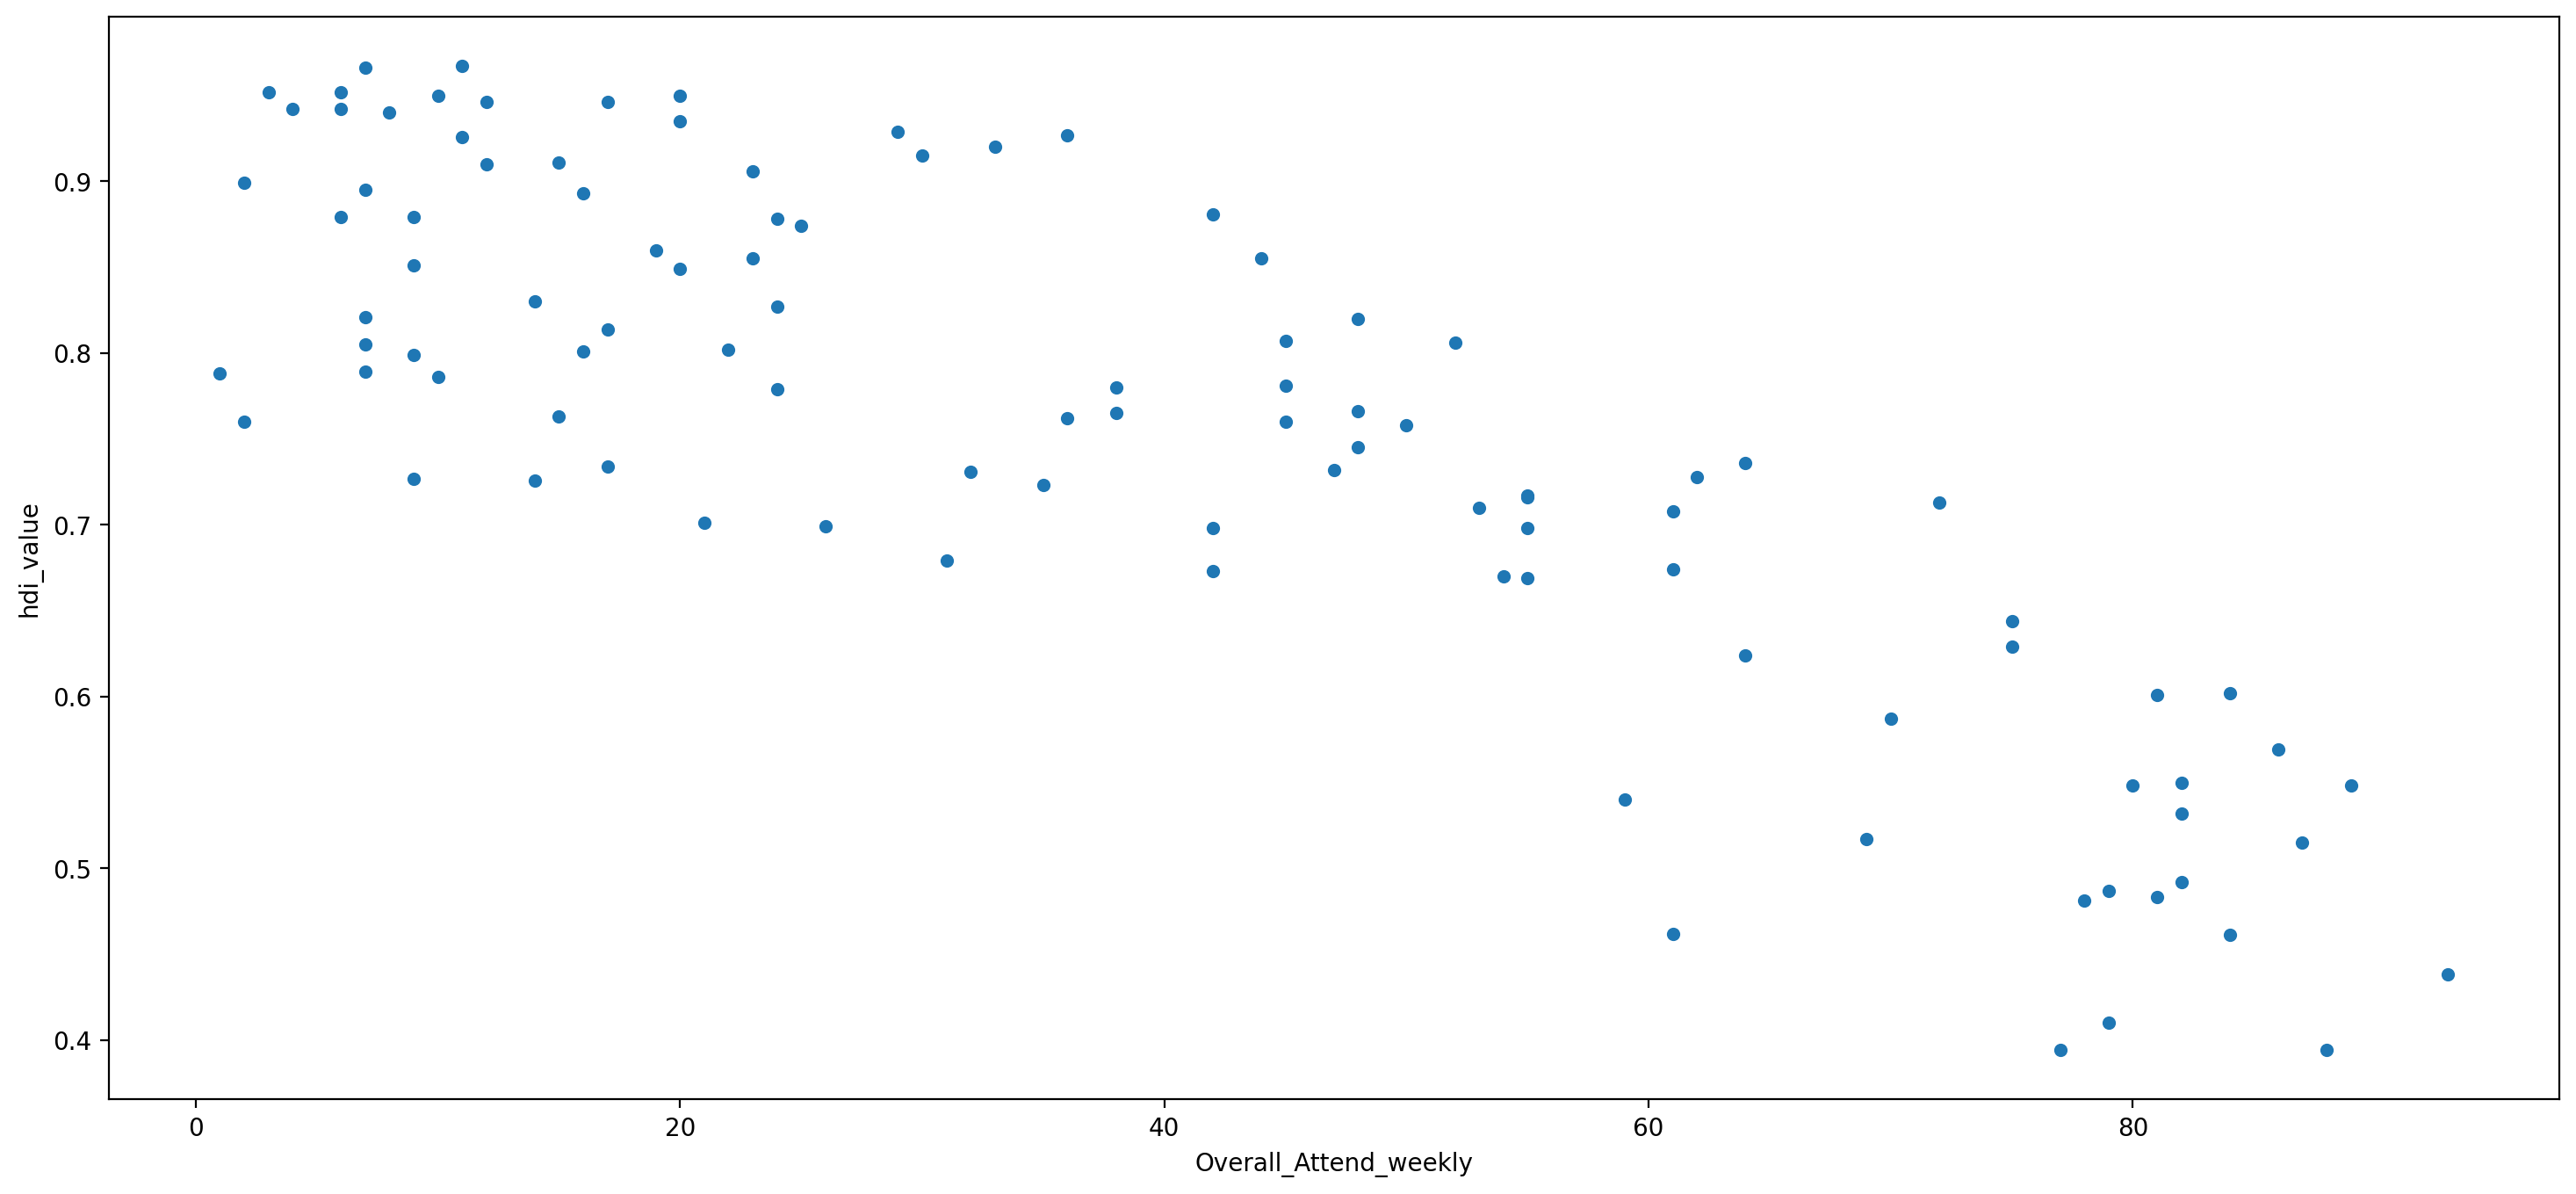

In [7]:

import matplotlib.pyplot as plt

countries_set = set(commitment_df.Country).intersection(set(hdi_df.Country))
rows_list = []
for country_name in countries_set:
    row_dict = {}
    row_dict['country_name'] = country_name
    mask_series = (commitment_df.Country == country_name)
    Overall_Attend_weekly = commitment_df[mask_series].Overall_Attend_weekly.squeeze()
    row_dict['Overall_Attend_weekly'] = Overall_Attend_weekly
    mask_series = (hdi_df.Country == country_name)
    hdi_value = hdi_df[mask_series].hdi_value.squeeze()
    row_dict['hdi_value'] = hdi_value
    rows_list.append(row_dict)
df = pd.DataFrame(rows_list).sort_values('Overall_Attend_weekly')
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
Line2D_objs_list = df.plot.scatter('Overall_Attend_weekly', 'hdi_value', ax=ax)

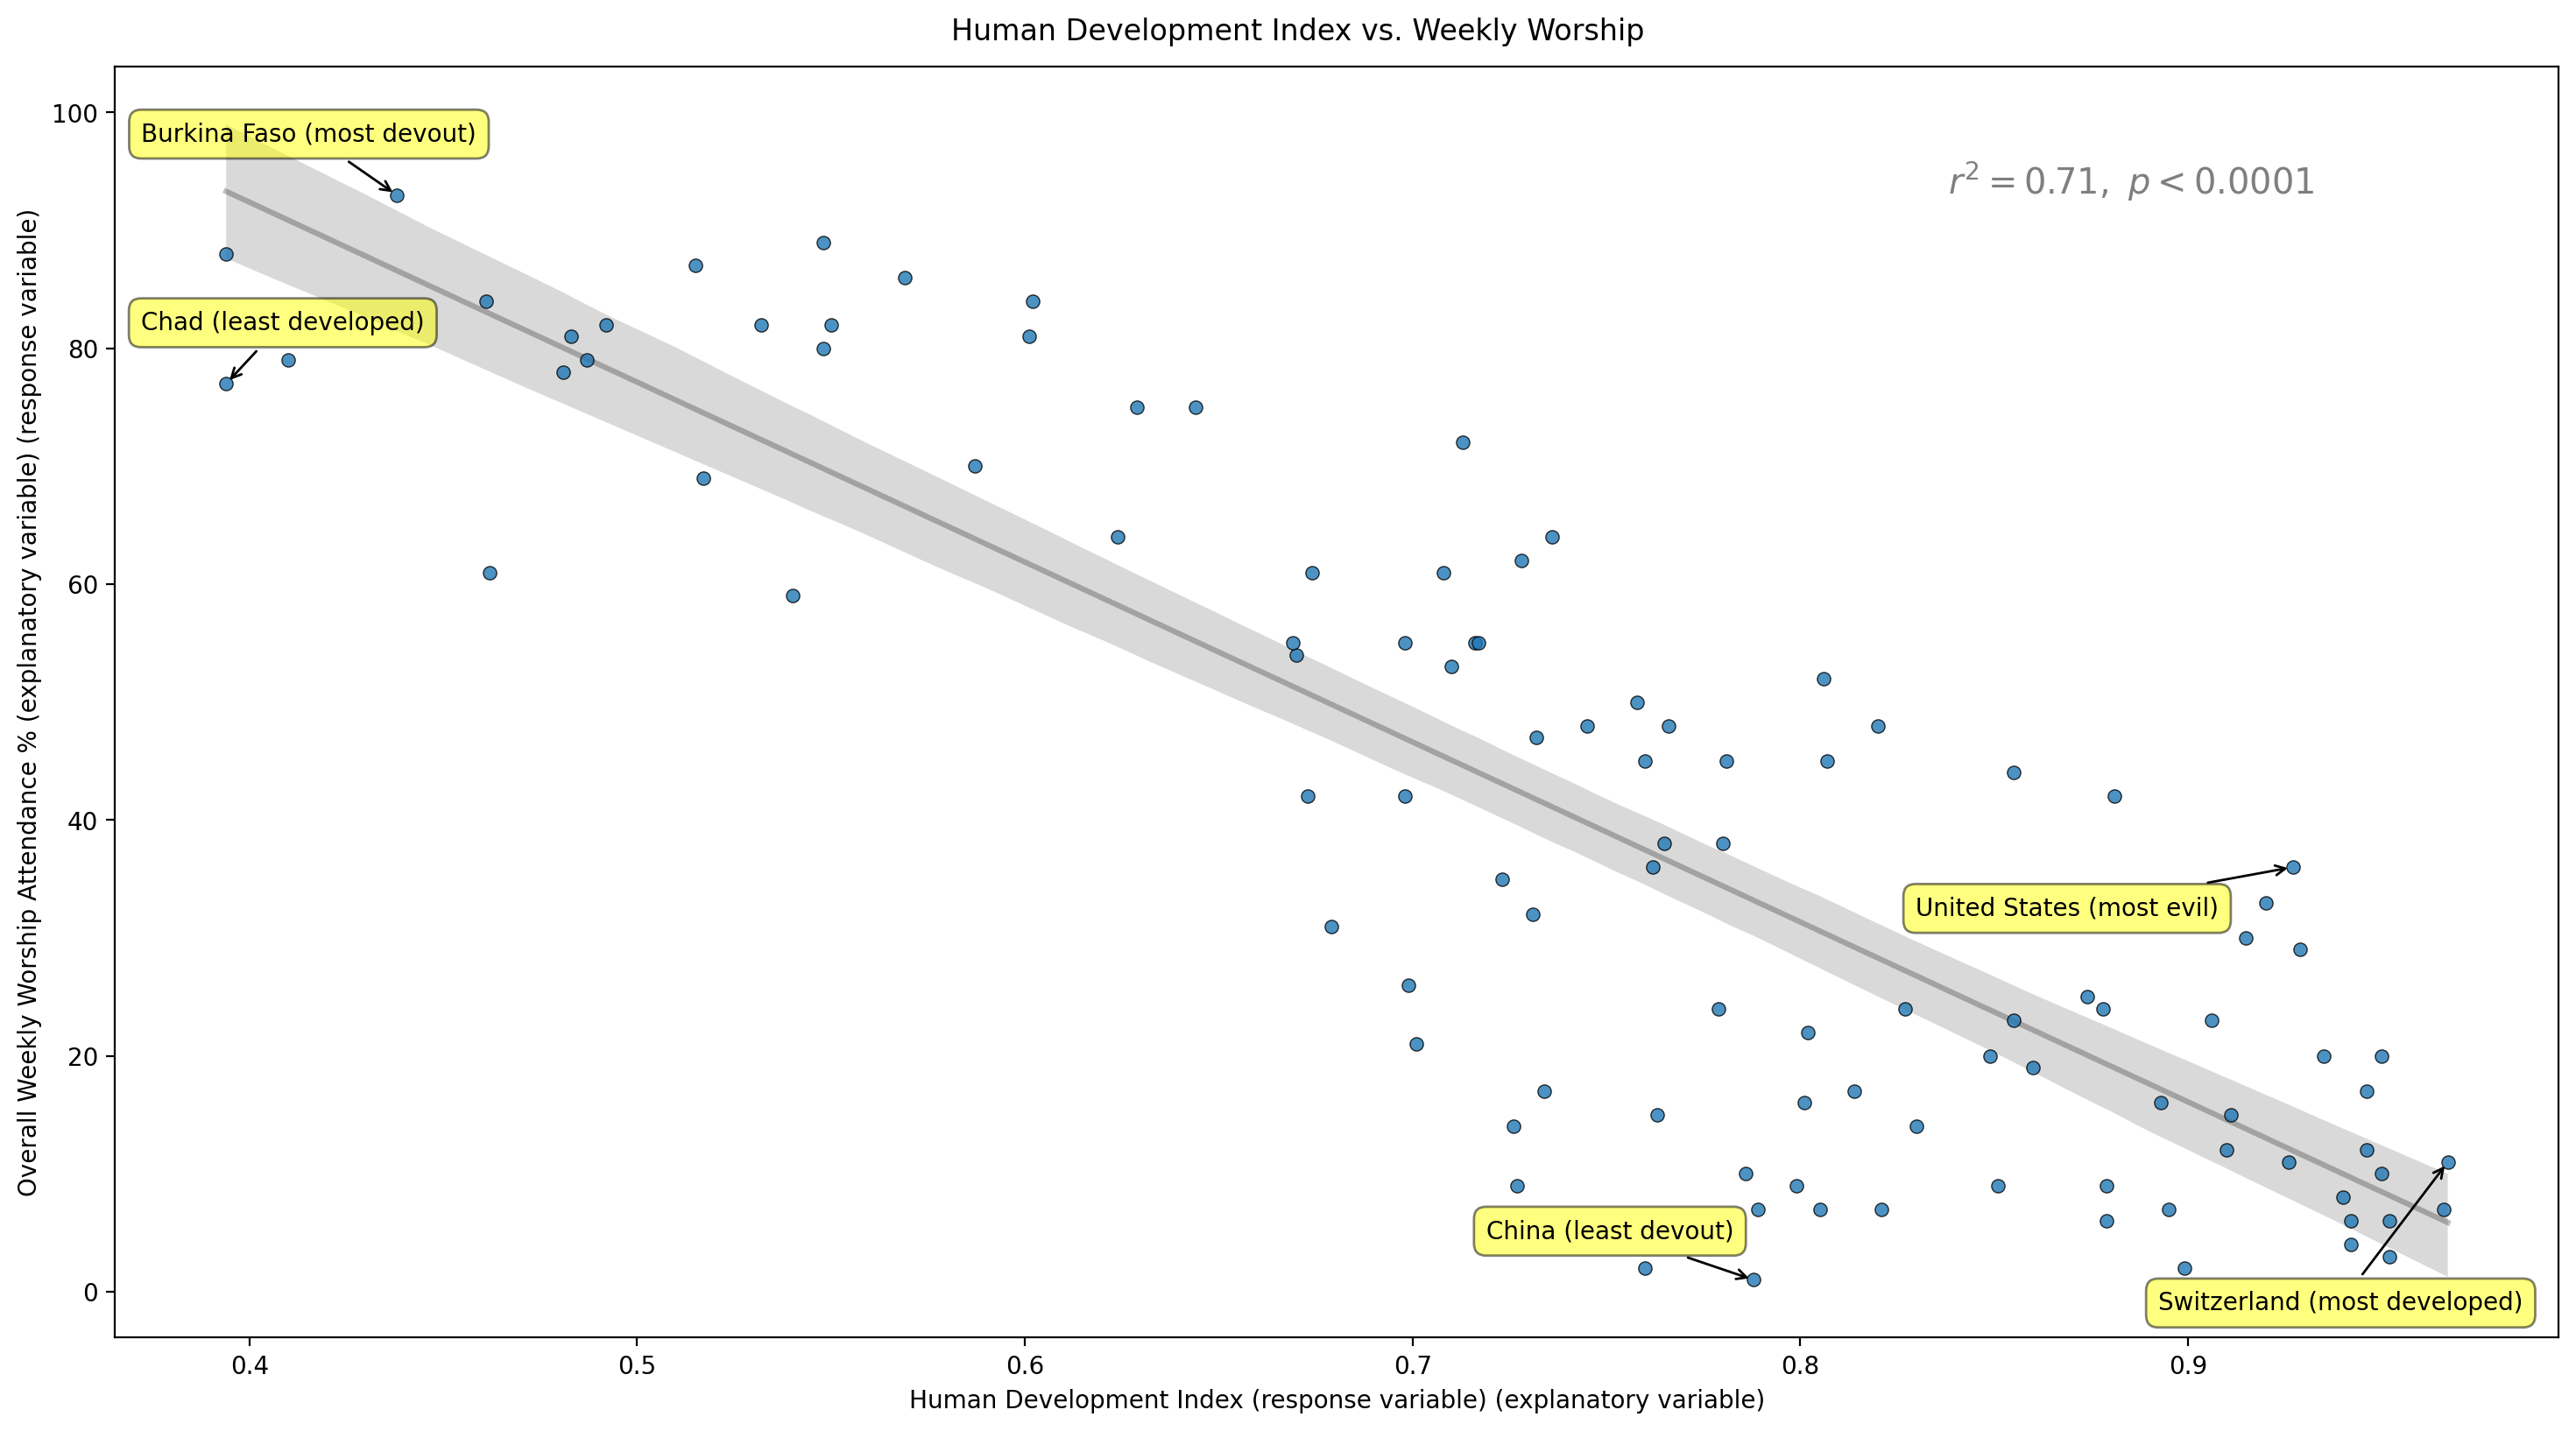

In [44]:

fig = nu.first_order_linear_scatterplot(
    df.set_index('country_name'), 'hdi_value', 'Overall_Attend_weekly',
    xlabel_str='Human Development Index (response variable)',
    ylabel_str='Overall Weekly Worship Attendance % (explanatory variable)',
    x_adj='developed', y_adj='devout',
    title='Human Development Index vs. Weekly Worship',
    # idx_reference='Kenya', annot_reference='',
    least_x_xytext=(-35, 20), most_x_xytext=(-119, -63),
    least_y_xytext=(-110, 15), most_y_xytext=(-105, 20),
    reference_xytext=(-155, -22), color_list=None
)


The US label is a light-hearted parody of the morally conceited nature of Woke social dynamics. Take it in the spirit it was given.